# Importing neccessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange
from numpy.polynomial import Polynomial

# Helper function to calculate percente finer

In [2]:
def calculate_percent_finer(df: pd.DataFrame) -> pd.DataFrame:
     
     """
     @param df: DataFrame with columns 'opening' and 'mass_retained'
     @return: DataFrame with additional column 'p_finer' which is the percent finer
     """

     total_mass = df.mass_retained.sum()
     arr = []

     for count, sieve in enumerate(df.opening.values):
         cumulative_mass = sum([df.mass_retained.values[i] for i in range(count + 1)])
         percent_finer = ((total_mass - cumulative_mass) / total_mass) * 100
         arr.append(percent_finer)
         
     return df.assign(p_finer = arr)

# Importing database and creating new databse with percente finer passing

In [3]:
df_temp = pd.read_csv('data.csv')

df = calculate_percent_finer(df_temp)

# View dataset

In [4]:
df

,opening,mass_retained,p_finer
0,4.750,0.0,100.000000
1,2.000,17.6,96.094963
2,0.850,56.3,83.603284
3,0.425,108.2,59.596184
4,0.250,91.9,39.205680
5,0.150,94.1,18.327047
6,0.075,57.6,5.546927
7,0.000,25.0,0.000000


# Making lagrangian interpolation

In [5]:
l_interp = lagrange(df.p_finer.values, df.opening.values)

# View coefficients of lagrangian interpolation

In [6]:
Polynomial(l_interp.coef[::-1]).coef

array([ 0.00000000e+00,  4.88514712e-02, -1.02197238e-02,  8.53135929e-04,
       -3.17073860e-05,  5.75969310e-07, -5.00575420e-09,  1.66572586e-11])

# Plot particle size analysis curve

/home/sayem/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sayem/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sayem/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sayem/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0, 0.5, 'Percent Finer (%)')

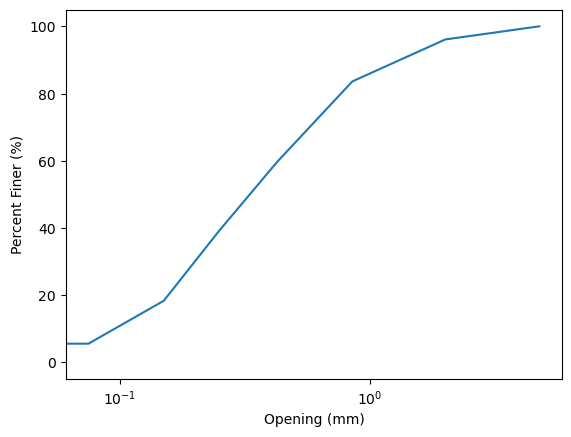

In [7]:
sns.lineplot(x = df.opening, y = df.p_finer)
plt.xscale('log')
plt.tick_params(axis = 'x', which = 'minor', bottom = False)
plt.xlabel('Opening (mm)')
plt.ylabel('Percent Finer (%)')

# Calculate D10,D30,D60 of aquifer formation

In [8]:
d10 = l_interp(10)
d30 = l_interp(30)
d60 = l_interp(60)

print(f'D10: {d10:.2f} mm')
print(f'D30: {d30:.2f} mm')
print(f'D60: {d60:.2f} mm')

D10: 0.06 mm
D30: 0.33 mm
D60: 0.44 mm


# Calculate coefficient of uniformity

In [9]:
cu = (d60 / d10)

print(f'Cu: {cu:.2f}')

Cu: 8.03


# Deciding pack-aquifer ratio

In [10]:
par = 4 

if cu < 2:
    par = 4
elif cu > 2:
    par = 6

print(f'Pack aquifer ratio: {par}')

Pack aquifer ratio: 6
